In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px


In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
#define the date  to fetch the data
today=date.today()
d1=today.strftime("%Y-%m-%d")
end_date=d1
d2=date.today()-timedelta(days=365)
d2=d2.strftime("%Y-%m-%d")
start_date=d2
print("your data will be between these days :",start_date,end_date)

your data will be between these days : 2024-06-14 2025-06-14


In [4]:
df=pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [6]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')


In [7]:
df=df[['Date','Close']]
df.head()

,Date,Close
0,2006-01-03,217.83
1,2006-01-04,222.84
2,2006-01-05,225.85
3,2006-01-06,233.06
4,2006-01-09,233.68


In [42]:
# make a plot on plotly
import plotly.express as px

fig = px.line(df, x='Date', y='Close', title='Stock Price Over Time')
fig.show()


In [9]:
fig=px.line(df,x='Date', y='Close', title='Google Stock Price')
fig.show()

In [10]:
#stationnarity check on data
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
    result=adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-values: %f' % result[1])
    if result[1]<=0.05:
        print("reject the null hypothesis. Data is stationary")
    else:
        print("fail to reject the null hypothesis. Data is not sataionary")
check_stationarity(df['Close'])

ADF Statistic: 1.322424
p-values: 0.996732
fail to reject the null hypothesis. Data is not sataionary


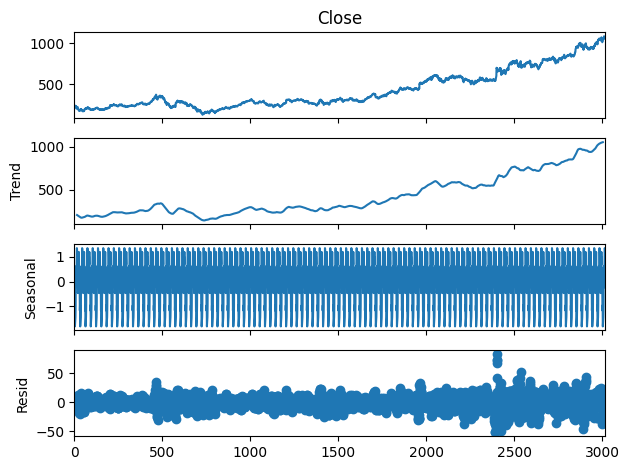

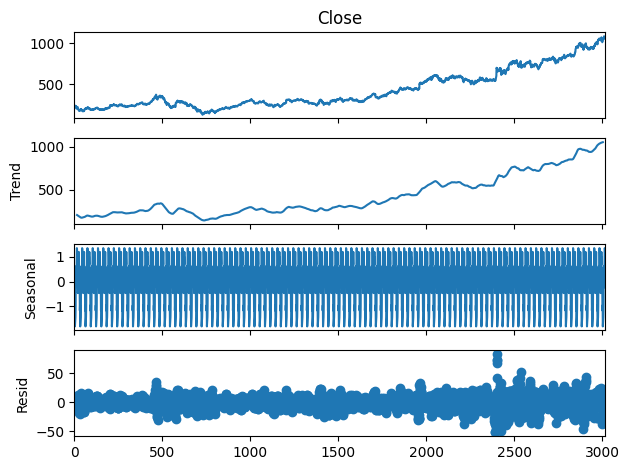

In [11]:
#decompose the datta to see the trend, sesonlity and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose= seasonal_decompose(df['Close'],model='additive',period=30)
decompose.plot()

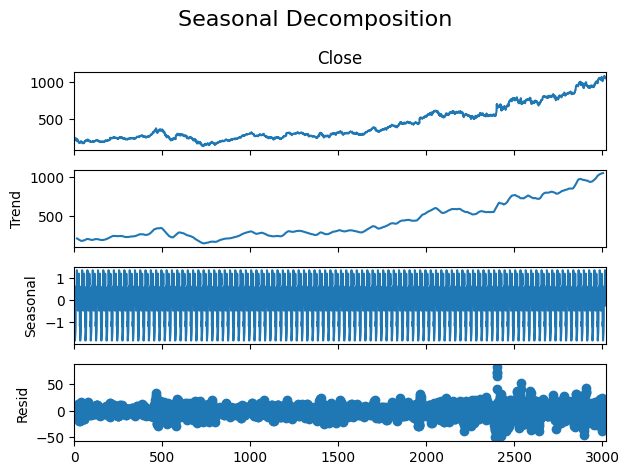

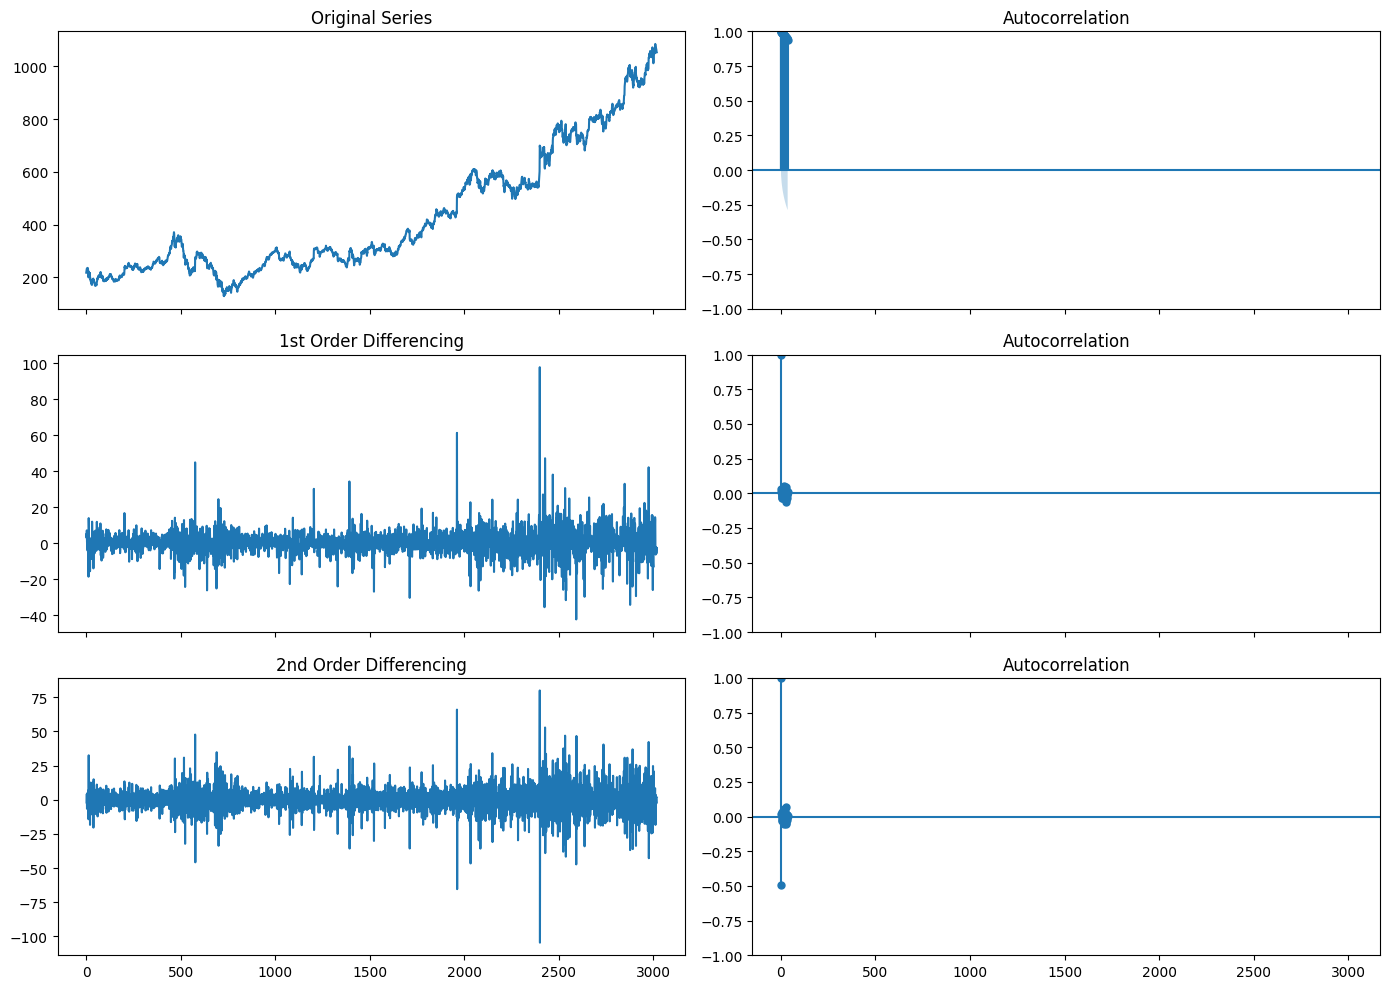

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Decompose to see trend, seasonality, and residuals
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()
plt.suptitle("Seasonal Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

# Plot ACF for original and differenced series
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)

# Original Series
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Order Differencing
first_diff = df['Close'].diff().dropna()
axes[1, 0].plot(first_diff); axes[1, 0].set_title('1st Order Differencing')
plot_acf(first_diff, ax=axes[1, 1])

# 2nd Order Differencing
second_diff = df['Close'].diff().diff().dropna()
axes[2, 0].plot(second_diff); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout()
plt.show()


           0
0   1.000000
1   0.998281
2   0.996534
3   0.994762
4   0.993006
5   0.991257
6   0.989513
7   0.987770
8   0.985991
9   0.984219
10  0.982508
11  0.980840
12  0.979181
13  0.977505
14  0.975847
15  0.974215
16  0.972593
17  0.971010
18  0.969430
19  0.967882
20  0.966258
21  0.964532
22  0.962775
23  0.960920
24  0.959063
25  0.957262
26  0.955530
27  0.953814
28  0.952147
29  0.950423
30  0.948692
31  0.947035
32  0.945373
33  0.943700
34  0.942003


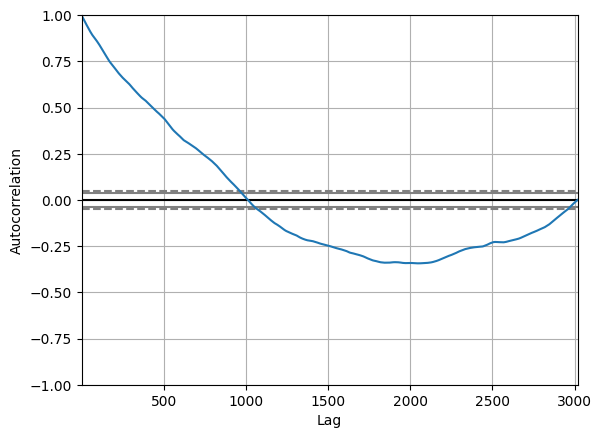

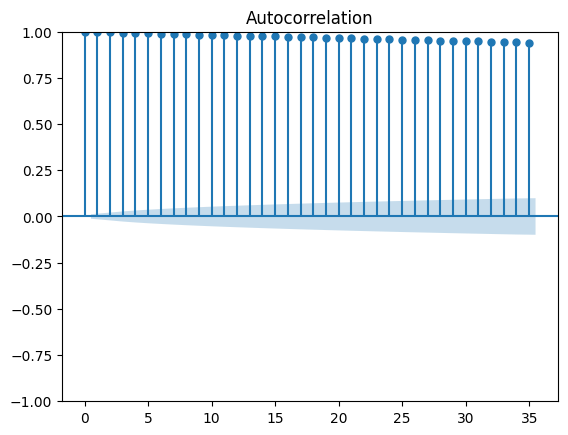

In [13]:
#plots

pd.plotting.autocorrelation_plot(df['Close'])
plot_acf(df['Close'],alpha=0.5)

from statsmodels.tsa.stattools import acf, pacf
x_acf=pd.DataFrame(acf(df['Close']))
print(x_acf)

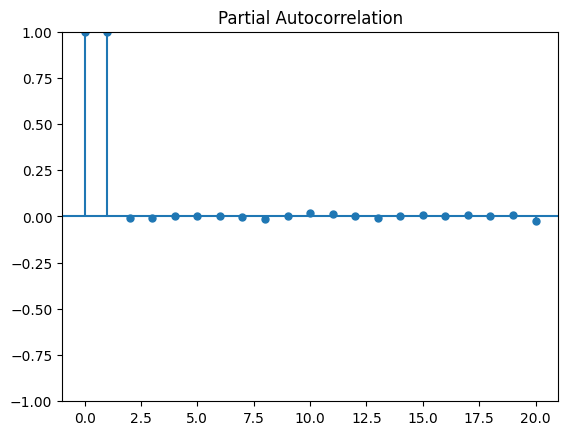

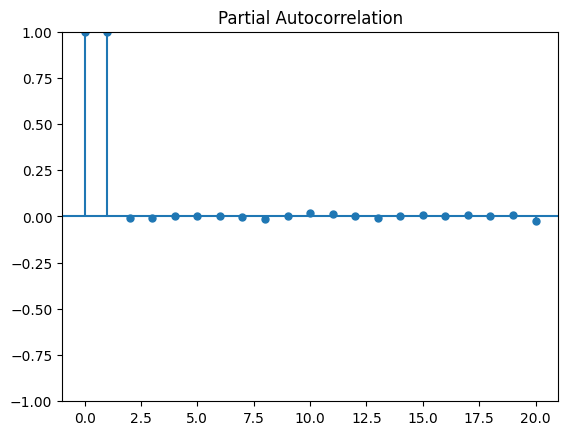

In [14]:
#p=2
#lests find the q values
# partial autocorrelation
plot_pacf(df['Close'],lags=20,alpha=2)

In [15]:
#lets define p,d,q
p=2
d=1
q=2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(df['Close'],
                   start_p=2, start_q=2,
                   max_p=5, max_q=5,
                   m=12,
                   seasonal=True, d=1, D=1,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3019
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10113.008
Date:                Sat, 14 Jun 2025   AIC                          20236.016
Time:                        12:16:53   BIC                          20266.078
Sample:                             0   HQIC                         20246.826
                               - 3019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6410      0.039     16.479      0.000       0.565       0.717
ar.L2         -0.9258      0.038    -24.354      0.000      -1.000      -0.851
ma.L1         -0.6196      0.040    -15.416      0.0

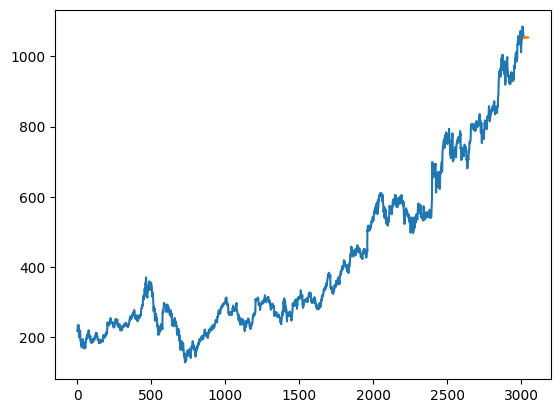

In [27]:
#stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p,d,q=2,1,2
model=ARIMA(df['Close'],order=(p,d,q))
model=model.fit()
print(model.summary())

#predict next 30 days 
#forecast=model.predict(n_periods=30)
forecast=model.predict(len(df['Close']),len(df['Close'])+30)
print(forecast)

#plot forecast
plt.Figure(figsize=(10,5))
plt.plot(df['Close'],label='Actual')
plt.plot(forecast,label='forecast')

In [31]:
#lets run sarima
import  statsmodels.api as sm
import warnings
p,d,q=2,1,2
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))
model=model.fit()
print(model.summary())

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3019
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood              -10103.085
Date:                            Sat, 14 Jun 2025   AIC                          20224.170
Time:                                    12:25:45   BIC                          20278.246
Sample:                                         0   HQIC                         20243.619
                                           - 3019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6299      0.315     -1.999      0.046      -1.248      -0.012
ar.L2         -0.2545      0.317   

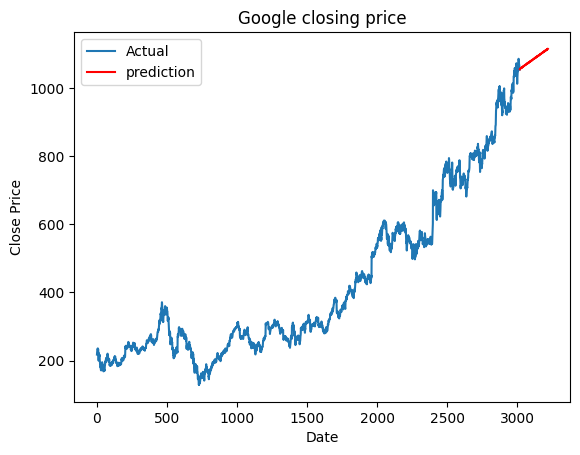

In [40]:
prediction=model.predict(start=len(df['Close']),end=len(df['Close'])+200)
#plot predition
plt.Figure(figsize=(15,10))
plt.plot(df['Close'],label='Actual')
plt.plot(prediction,color='red',label='prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')

#chane legend locatin
plt.legend(loc='upper left')
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



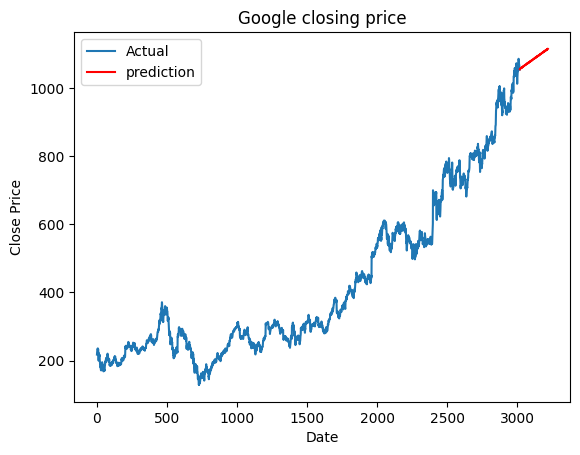

In [41]:
#lets update p,d,q
import  statsmodels.api as sm
import warnings
p,d,q=3,1,2
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(p,d,q),seasonal_order=(p,d,q,12))
model=model.fit()
prediction=model.predict(start=len(df['Close']),end=len(df['Close'])+200)
#plot predition
plt.Figure(figsize=(15,10))
plt.plot(df['Close'],label='Actual')
plt.plot(prediction,color='red',label='prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')

#chane legend locatin
plt.legend(loc='upper left')
plt.show()

